In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as sps
from scipy.stats import gamma

##**Ejercicio 1**: Sean $X_1, \dots, X_6$ variables aleatorias i.i.d con distribución $Exp(5)$. Generar $10000$ realizaciondes independientes de la variable aleatoria $Y$, donde $Y=X_1+\cdots+X_6$.

Comparar el histograma de densidad con ancho de banda $0.05$ con la función de densidad de una variable con distribución $\Gamma(6,5)$.

Qué conclusión podemos sacar?

In [2]:
from scipy.special import gamma

In [3]:
# Densidad de una Gamma
def pdfGamma(a, l, x):
    return (l ** a) * (x ** (a - 1)) * np.exp(-l * x) / gamma(a) # Dedicí implementarlo, pero podría llamar a sps.gamma.pdf(x, a, scale=1/l)

In [4]:
N     = 10000
alpha = 6
lam   = 5     # Lambda

sample = np.sum(np.random.exponential(scale=1/lam, size=(alpha,N)), axis=0) # (ATENCION: no toma lambda de parámetro, sino la esperanza)

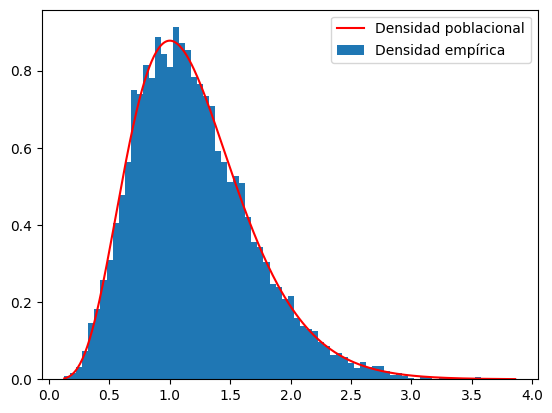

In [5]:
# Histograma de densidad
bw = 0.05                                                                                     # Ancho de banda
t  = np.linspace(min(sample), max(sample) + bw, int((max(sample) + bw - min(sample)) / 0.01)) # Discretizo la recta para graficar la densidad

plt.plot(t, pdfGamma(alpha, lam, t), color='red', label='Densidad poblacional')
plt.hist(sample, bins=np.arange(min(sample), max(sample) + bw, bw), density=True, label='Densidad empírica')

plt.legend()
plt.show()

##**Ejercicio 2**: Generar $100$ muestras de $15$ realizaciones cada una para variables aleatorias independientes con distribución Normal de parámetros $\mu = 5$, $\sigma^2=16$.

Considerar los datos generados y calcular 100 intervalos de confianza del $95\%$ para $\mu$ asumiendo $\sigma$ conocida.

Graficar e indicar cuáles de los intervalos contienen a $\mu$.

Recordar que el intervalo de confianza para $\mu$ a nivel $1-\alpha\%$ es:
$$\left(-z_{\alpha/2}\frac{\sigma}{\sqrt{N}}+\bar{X},\, z_{\alpha/2}\frac{\sigma}{\sqrt{N}}+\bar{X}\right).$$

In [ ]:
mu    = 5
sigma = 4
alpha = 0.05
M     = 100
N     = 15
sup   = np.zeros(M)         # Acá vamos a guardar el extemo superior del intervalo para cada muestra
inf   = np.zeros(M)         # Acá vamos a guardar el extemo inferior del intervalo para cada muestra

norm = sps.norm(loc=0, scale=1)

In [ ]:
# Simulaciones
for i in range(M):
    sample = np.random.normal(loc=mu, scale=sigma, size=N)
    mean   = np.mean(sample)
    sup[i] = norm.ppf(1-alpha/2) * sigma / np.sqrt(N) + mean # Podría haber definido z = norm.ppf(1-alpha/2), o bien z = norm.isf(alpha/2)
    inf[i] = norm.ppf(alpha/2) * sigma / np.sqrt(N) + mean   # y entonces haber usado -z en esta línea

In [ ]:
# Intervalos en función del número de la muestra
plt.title(r'Intervalos de confianza para $\mu$', fontsize = 20)
plt.ylabel(r'$(a,b)$', fontsize = 15)
plt.xlabel(r'$Muestra$',fontsize = 15)
plt.axhline(y=mu, color='grey')         # Graficamos el valor de mu como referencia

for i in range(M):
    plt.plot((i, i), (inf[i], sup[i]), 'g-' if (mu >= inf[i] and mu <= sup[i]) else 'r-')
    # El intervalo lo pintamos verde si contiene a mu, rojo en caso contrario

plt.show()

##**Ejercicio 3**: Repetir el ejercicio anterior, ahora sin suponer que se conoce el valor de $\sigma$.

Qué esperaría que pase si las muestras pasan a ser de tamaño $1000$? Comparar.



Recordar que el intervalo de confianza para $\mu$ a nivel $1-\alpha\%$ es:
$$\left(-t_{\alpha/2}\frac{S}{\sqrt{N}}+\bar{X},\, t_{\alpha/2}\frac{S}{\sqrt{N}}+\bar{X}\right).$$

In [ ]:
mu    = 5
sigma = 4
alpha = 0.05
M     = 100
N     = 15
sup   = np.zeros(M)         # Acá vamos a guardar el extemo superior del intervalo para cada muestra
inf   = np.zeros(M)         # Acá vamos a guardar el extemo inferior del intervalo para cada muestra

t = sps.t(df=N-1)

In [ ]:
# Simulaciones
for i in range(M):
    sample = np.random.normal(loc=mu, scale=sigma, size=N)
    mean   = np.mean(sample)
    s      = np.std(sample, ddof=1)
    sup[i] = t.ppf(1-alpha/2) * s / np.sqrt(N) + mean
    inf[i] = t.ppf(alpha/2) * s / np.sqrt(N) + mean

In [ ]:
# Intervalos en función del número de la muestra
plt.title(r'Intervalos de confianza para $\mu$', fontsize = 20)
plt.ylabel(r'$(a,b)$', fontsize = 15)
plt.xlabel(r'$Muestra$',fontsize = 15)
plt.axhline(y=mu, color='grey')         # Graficamos el valor de mu como referencia

for i in range(M):
    plt.plot((i, i), (inf[i], sup[i]), 'g-' if (mu >= inf[i] and mu <= sup[i]) else 'r-')
    # El intervalo lo pintamos verde si contiene a mu, rojo en caso contrario

plt.show()

In [ ]:
N = 1000
M = 10000

contiene_exacto = 0      # Voy a contar cuántos de los intervalos con la distribución exacta contienen a mu
contiene_aprox  = 0      # Voy a contar cuántos de los intervalos con la distribución aproximada contienen a mu

t = sps.t(df=N-1)

for _ in range(M):
    sample = np.random.normal(loc=mu, scale=sigma, size=N)
    mean   = np.mean(sample)
    s      = np.std(sample, ddof=1)

    sup_exacto = t.ppf(1-alpha/2) * s / np.sqrt(N) + mean
    inf_exacto = t.ppf(alpha/2) * s / np.sqrt(N) + mean
    if (mu >= inf_exacto and mu <= sup_exacto):
      contiene_exacto += 1

    sup_aprox = norm.ppf(1-alpha/2) * s / np.sqrt(N) + mean
    inf_aprox = norm.ppf(alpha/2) * s / np.sqrt(N) + mean
    if (mu >= inf_aprox and mu <= sup_aprox):
      contiene_aprox += 1

print(r'Usando la distribución exacta, el ', contiene_exacto / M, '% de los intervalos contienen a la media.')
print(r'Usando la distribución aproximada, el ', contiene_aprox / M, '% de los intervalos contienen a la media.')

##**Ejercicio 4**: Generar $100$ muestras de $50$ realizaciones de variables aleatorias independientes con distribución $Be(p)$ con $p=.13$.

Calcular un intervalo de confianza del $97\%$ para $p$, usando solo $\bar{x}$ como dato.

Cuál debería ser el intervalo de confianza?

Cuán grande debería tomar la muestra si quiero asegurarme, con $97\%$ de confianza, que el error al estimar $p$ no sea mayor a $0.01$?

In [ ]:
p     = .13
N     = 50
M     = 100
alpha = .03
sup   = np.zeros(M)         # Acá vamos a guardar el extemo superior del intervalo para cada muestra
inf   = np.zeros(M)         # Acá vamos a guardar el extemo inferior del intervalo para cada muestra

norm = sps.norm(loc=0, scale=1)

In [ ]:
# Simulaciones
for i in range(M):
    sample = np.random.binomial(N, p) # Podría haber llamado a sps.bernoulli.rvs(p, size = N)
    mean   = sample / N
    # Podríamos calcular S, incluso sin la muestra, usando el promedio (porque en este caso es fácil recuperar lo que nos interesa de la muestra)
    s = (mean * ( 1 - mean )) ** 0.5
    sup[i] = norm.ppf(1-alpha/2) * s / np.sqrt(N) + mean
    inf[i] = norm.ppf(alpha/2) * s / np.sqrt(N) + mean
    # Notar que esto no garantiza que inf >= 0 ni sup <= 1 (lo que sería razonable pedir)

In [ ]:
# Intervalos en función del número de la muestra
plt.title(r'Intervalos de confianza para $p$', fontsize = 20)
plt.ylabel(r'$(a,b)$', fontsize = 15)
plt.xlabel(r'$Muestra$',fontsize = 15)
plt.axhline(y=p, color='grey')         # Graficamos el valor de p como referencia

for i in range(M):
    plt.plot((i, i), (inf[i], sup[i]), 'g-' if (p >= inf[i] and p <= sup[i]) else 'r-')
    # El intervalo lo pintamos verde si contiene a p, rojo en caso contrario

plt.show()

##**Ejercicio 5**: Generar $100$ muestras de $100$ realizaciones de variables aleatorias independientes con distribución $Exp(\lambda)$ para $\lambda = 3$.

* Considerar los datos generados y calcular un intervalo de confianza del $95\%$ para $\lambda$.  
* Qué debería hacer si solo tengo $\bar{x}$ como dato?
* Hay algo que pueda intentar si en vez de $100$ realizaciones, tengo solo $10$?
* Y si quiero que el intervalo sea unilateral?

In [ ]:
lam   = 3
N     = 100
M     = 100
alpha = .05
sup   = np.zeros(M)         # Acá vamos a guardar el extemo superior del intervalo para cada muestra
inf   = np.zeros(M)         # Acá vamos a guardar el extemo inferior del intervalo para cada muestra

norm = sps.norm(loc=0, scale=1)

In [ ]:
# Simulaciones
for i in range(M):
    sample = np.random.exponential(scale=1/lam, size=N)
    mean   = np.mean(sample)
    s      = mean # np.std(sample, ddof=1)
    a      = norm.ppf(alpha/2) * s / np.sqrt(N) + mean
    b      = norm.ppf(1-alpha/2) * s / np.sqrt(N) + mean
    # Notar que esto no garantiza que a >= 0 (por más que yo sé que tiene sentido), y voy a asumir que pasa (no siempre es cierto!)
    sup[i] = 1 / a
    inf[i] = 1 / b

In [ ]:
# Intervalos en función del número de la muestra
plt.title(r'Intervalos de confianza para $\lambda$', fontsize = 20)
plt.ylabel(r'$(a,b)$', fontsize = 15)
plt.xlabel(r'$Muestra$',fontsize = 15)
plt.axhline(y=lam, color='grey')         # Graficamos el valor de lambda como referencia

for i in range(M):
    plt.plot((i, i), (inf[i], sup[i]), 'g-' if (lam >= inf[i] and lam <= sup[i]) else 'r-')
    # El intervalo lo pintamos verde si contiene a lambda, rojo en caso contrario

plt.show()

In [ ]:
N = 10
for i in range(M):
    sample = np.random.exponential(scale=1/lam, size=N)
    sum    = np.sum(sample)
    sup[i] = sps.gamma.isf(alpha/2, a=N, scale=1) / sum
    inf[i] = sps.gamma.ppf(alpha/2, a=N, scale=1) / sum


plt.title(r'Intervalos de confianza para $\lambda$', fontsize = 20)
plt.ylabel(r'$(a,b)$', fontsize = 15)
plt.xlabel(r'$Muestra$',fontsize = 15)
plt.axhline(y=lam, color='grey')         # Graficamos el valor de lambda como referencia

for i in range(M):
    plt.plot((i, i), (inf[i], sup[i]), 'g-' if (lam >= inf[i] and lam <= sup[i]) else 'r-')
    # El intervalo lo pintamos verde si contiene a lambda, rojo en caso contrario

plt.show()

##**Ejercicio 6:** En las mismas condiciones que en el ejercicio 2, calcular 100 intervalos para $\sigma^2$ con $95\%$ de confianza.


Recordar que el intervalo de confianza para $\sigma^2$ a nivel $1-\alpha\%$ es:
$$\left(\frac{(n-1)S^2}{\chi^2_{\alpha/2}},\, \frac{(n-1)S^2}{\chi^2_{1-\alpha/2}}\right).$$

In [ ]:
mu    = 5
sigma = 4
alpha = 0.05
M     = 100
N     = 15
sup   = np.zeros(M)         # Acá vamos a guardar el extemo superior del intervalo para cada muestra
inf   = np.zeros(M)         # Acá vamos a guardar el extemo inferior del intervalo para cada muestra

chi2 = sps.chi2(df=(N-1))

In [ ]:
# Simulaciones
for i in range(M):
    sample = np.random.normal(loc=mu, scale=sigma, size=N)
    mean   = np.mean(sample)
    var    = np.var(sample, ddof=1)
    sup[i] = (N - 1) * var / chi2.ppf(alpha/2)
    inf[i] = (N - 1) * var / chi2.ppf(1-alpha/2)

In [ ]:
# Intervalos en función del número de la muestra
plt.title(r'Intervalos de confianza para $\mu$', fontsize = 20)
plt.ylabel(r'$(a,b)$', fontsize = 15)
plt.xlabel(r'$Muestra$',fontsize = 15)
plt.axhline(y=sigma**2, color='grey')         # Graficamos el valor de sigma^2 como referencia

for i in range(M):
    plt.plot((i, i), (inf[i], sup[i]), 'g-' if (sigma**2 >= inf[i] and sigma**2 <= sup[i]) else 'r-')
    # El intervalo lo pintamos verde si contiene a sigma^2, rojo en caso contrario

plt.show()